Корреляция между переменными 'Улица' и 'Гараж': -0.9999999999999998


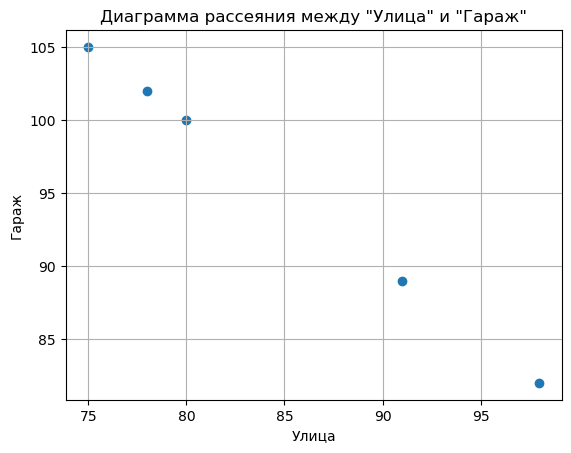

In [3]:
import matplotlib.pyplot as plt
import numpy as np

street = np.array([80, 98, 75, 91, 78])
garage = np.array([100, 82, 105, 89, 102])

#Вычисление коэффициента корреляции Пирсона
correlation = np.corrcoef(street, garage)[0, 1] #без выведения всей матрицы

print("Корреляция между переменными 'Улица' и 'Гараж':", correlation)

#Диаграмма рассеяния
plt.grid(True)
plt.scatter(street, garage)
plt.xlabel('Улица')
plt.ylabel('Гараж')
plt.title('Диаграмма рассеяния между "Улица" и "Гараж"')
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   charges   1338 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 41.9 KB
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
               age       bmi  children   charges
age       1.000000  0.109272 

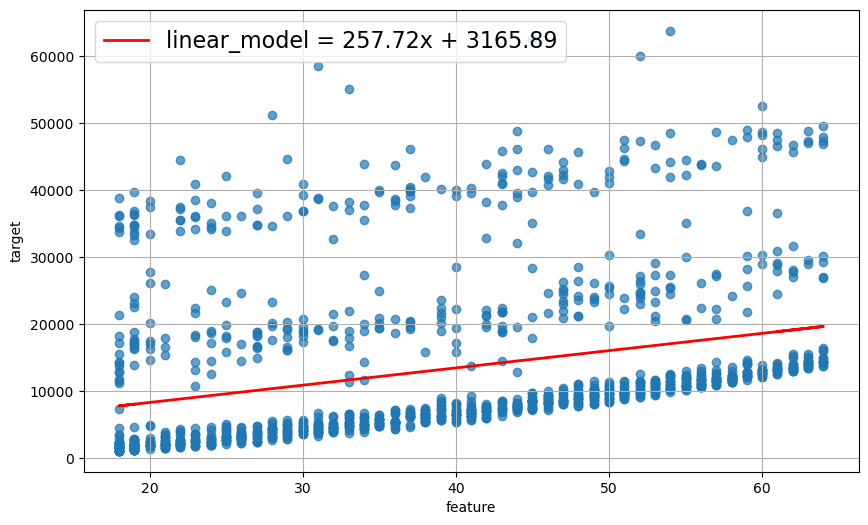

Среднее квадратичное отклонение:  133440978.61376347


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data = pd.read_csv('insurance.csv')
data.dropna(inplace=True)
data = data.drop(columns=['region', 'smoker', 'sex'])
data.info()
print(data.describe())
# Построение корреляционной матрицы
correlation_matrix = data.corr()
print(correlation_matrix)
# Выбор наиболее коррелирующей переменной
target_corr = correlation_matrix["charges"].abs().sort_values(ascending=False)
most_correlated_variable = target_corr.index[1] # Исключаем саму целевую переменную
print("Наиболее коррелирующая переменная с charges:", most_correlated_variable)

model = LinearRegression()

X = data[[most_correlated_variable]]
y = data["charges"]
X = np.array(X,type(float))
y = np.array(y,type(int))

#Наклон и сдвиг
model.fit(X,y)
model.coef_, model.intercept_
#Ошибки. ищем среднее квадратичное отклонение
model_a = model.coef_[0]
model_b = model.intercept_
model_y_sk = model_a * X + model_b

fig = plt.figure(figsize=(10,6))
plt.plot(X, model_y_sk, linewidth=2, color = "r", label=f'linear_model = {model_a:.2f}x + {model_b:.2f}')
plt.scatter(X,y, alpha=0.7)
plt.grid()
plt.xlabel('feature')
plt.ylabel('target')
plt.legend(prop={'size': 16})
plt.show()

print("Среднее квадратичное отклонение: ", mean_squared_error(model_y_sk, y))

['southwest' 'southeast' 'northwest' 'northeast']
F-значение (Scipy): 39.49505720170283
p-значение (Scipy): 1.881838913929143e-24
               df        sum_sq      mean_sq          F        PR(>F)
C(region)     3.0   4055.880631  1351.960210  39.495057  1.881839e-24
Residual   1334.0  45664.319755    34.231124        NaN           NaN
Тест Шапиро-Уилка:
Регион southwest: статистика=0.9949, p-значение=0.3630
Регион southeast: статистика=0.9911, p-значение=0.0270
Регион northwest: статистика=0.9955, p-значение=0.4655
Регион northeast: статистика=0.9920, p-значение=0.0796

Попарные t-тесты с поправкой Бонферрони:
Регионы и southeast: p-значение=0.0000
Регионы и northwest: p-значение=0.0065
Регионы и northeast: p-значение=0.0115
Регионы и northwest: p-значение=0.0000
Регионы и northeast: p-значение=0.0000
Регионы и northeast: p-значение=5.7116


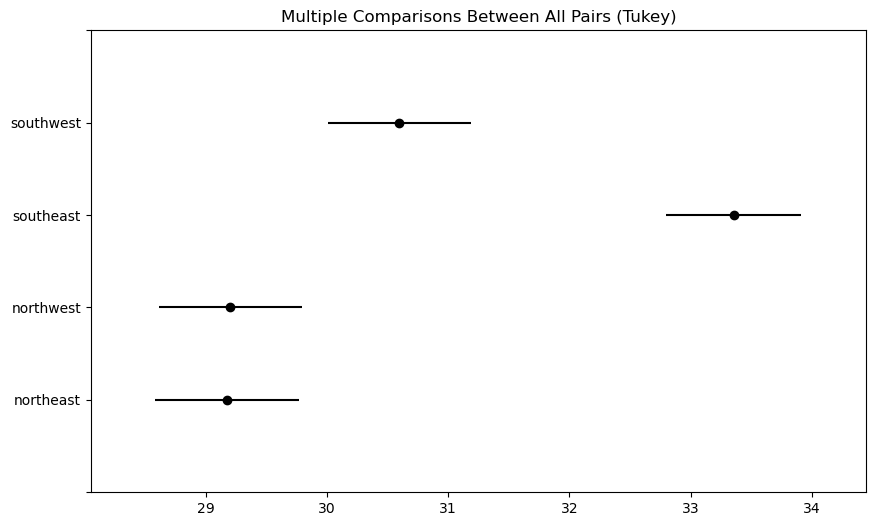

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,0.0263,0.9999,-1.1552,1.2078,False
northeast,southeast,4.1825,0.0,3.033,5.332,True
northeast,southwest,1.4231,0.0107,0.2416,2.6046,True
northwest,southeast,4.1562,0.0,3.0077,5.3047,True
northwest,southwest,1.3968,0.0127,0.2162,2.5774,True
southeast,southwest,-2.7594,0.0,-3.9079,-1.6108,True


In [17]:
import pandas as pd
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
data = pd.read_csv("insurance.csv")
data = data.dropna()
unique_regions = data['region'].unique()
print(unique_regions)
# Выполнение ANOVA теста с помощью Scipy
fvalue, pvalue = stats.f_oneway(data[data['region'] == unique_regions[0]]['bmi'],
                                data[data['region'] == unique_regions[1]]['bmi'],
                                data[data['region'] == unique_regions[2]]['bmi'],
                                data[data['region'] == unique_regions[3]]['bmi'])

print("F-значение (Scipy):", fvalue)
print("p-значение (Scipy):", pvalue)

# Создание формулы для модели
formula = 'bmi ~ C(region)'

# Выполнение ANOVA теста с помощью statsmodels
model = ols(formula, data=data).fit()
anova_results = anova_lm(model)

print(anova_results)

print("Тест Шапиро-Уилка:")
for region in unique_regions:
    samples = data[data['region'] == region]['bmi']
    stat, p = shapiro(samples)
    print(f"Регион {region}: статистика={stat:.4f}, p-значение={p:.4f}")
# Попарные t-тесты с поправкой Бонферрони
print("\nПопарные t-тесты с поправкой Бонферрони:")
for i in range(len(unique_regions)-1):
    for j in range(i+1, len(unique_regions)):
        region1 = unique_regions[i]
        region2 = unique_regions[j]
        samples1 = data[data['region'] == region1]['bmi']
        samples2 = data[data['region'] == region2]['bmi']
        stat, p = ttest_ind(samples1, samples2)
        bonferroni_p = p * (len(unique_regions) * (len(unique_regions) - 1) / 2)
        print(f"Регионы и {region2}: p-значение={bonferroni_p:.4f}")
        
tukey_results = pairwise_tukeyhsd(data["bmi"], data["region"])
tukey_results.plot_simultaneous()
plt.show()
tukey_results.summary()

['southwest' 'southeast' 'northwest' 'northeast']
              df        sum_sq      mean_sq          F        PR(>F)
region       3.0   4055.880631  1351.960210  39.539923  1.773031e-24
sex          1.0     86.007035    86.007035   2.515393  1.129767e-01
Residual  1333.0  45578.312720    34.192283        NaN           NaN


group1,group2,meandiff,p-adj,lower,upper,reject
northeast / female,northeast / male,-0.2998,0.9998,-2.2706,1.6711,False
northeast / female,northwest / female,-0.0464,1.0,-2.0142,1.9215,False
northeast / female,northwest / male,-0.2042,1.0,-2.1811,1.7728,False
northeast / female,southeast / female,3.3469,0.0,1.41,5.2839,True
northeast / female,southeast / male,4.6657,0.0,2.7634,6.568,True
northeast / female,southwest / female,0.7362,0.9497,-1.2377,2.71,False
northeast / female,southwest / male,1.8051,0.1007,-0.1657,3.776,False
northeast / male,northwest / female,0.2534,0.9999,-1.7083,2.2152,False
northeast / male,northwest / male,0.0956,1.0,-1.8752,2.0665,False
northeast / male,southeast / female,3.6467,0.0,1.7159,5.5775,True


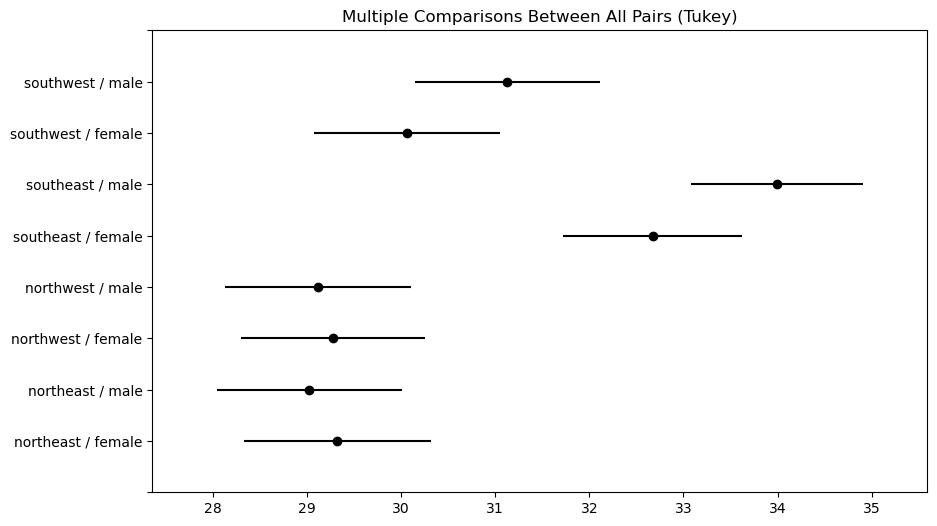

In [3]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import statsmodels.api as sm
df = pd.read_csv('insurance.csv')
df = df.dropna()
unique_regions = df['region'].unique()
print(unique_regions)
#двухфакторный ANOVA тест
model = ols('bmi ~ region + sex', data=df).fit()
anova_result = sm.stats.anova_lm(model)
print(anova_result)
#пост-хок тесты Тьюки
df['combination'] = df.region + " / " + df.sex
tukey = pairwise_tukeyhsd(endog = df['bmi'], groups = df['combination'], alpha = 0.05)
result = tukey.plot_simultaneous()
tukey.summary()